In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt


import tensorflow as tf

In [2]:
from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')

In [3]:
trainData = pd.read_csv("TrainingDataMulti.csv", sep=",",header=None)
testData = pd.read_csv("TestingDataMulti.csv", sep=",",header=None)

In [4]:
df_train = pd.DataFrame(data = trainData)
df_test = pd.DataFrame(data = testData)

In [5]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.iloc[:,:-1]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,116.889120,131860.3269,-3.076783,131810.1804,-123.094253,131910.4735,114.780635,376.10794,-5.254023,374.82617,...,0,0,0,0,0,0,0,0,0,0
5996,116.849013,131810.1804,-3.116890,131760.0339,-123.128630,131885.4002,114.769176,376.29105,-5.322778,374.82617,...,0,0,0,0,0,0,0,0,0,0
5997,116.384917,131734.9606,-3.586716,131684.8140,-123.586996,131785.1071,114.299351,376.47416,-5.849899,374.82617,...,0,0,0,0,0,0,0,0,0,0
5998,111.125164,130506.3704,-8.846468,130456.2238,-128.858208,130556.5169,106.667553,478.83265,-13.464508,477.73399,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: 128, Length: 6000, dtype: int64

In [8]:
df_train.iloc[:,-1].value_counts()

0    3000
2    1500
1    1500
Name: 128, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42)

In [10]:


pipe = make_pipeline(StandardScaler(), SGDClassifier())
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
SGD_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SGD_accuracy)) 

Test set accuracy: 0.65


In [11]:

pipe = make_pipeline(StandardScaler(), SVC(kernel='poly'))
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
SVM_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SVM_accuracy)) 

Test set accuracy: 0.64


In [12]:
pipe = make_pipeline(StandardScaler(),LogisticRegression(C=100, max_iter=1000))
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
LG_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(LG_accuracy)) 

Test set accuracy: 0.72


In [13]:
pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
DT_accuracy = pipe.score(X_test, y_test)
pipe
print("Test set accuracy: {:.2f}".format(DT_accuracy)) 

Test set accuracy: 0.91


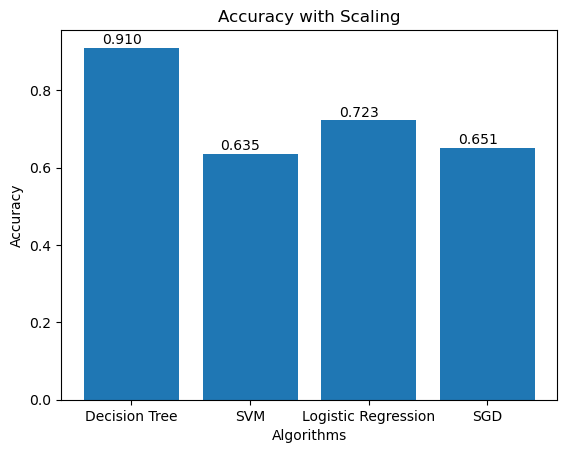

In [14]:
x_axis = ['Decision Tree', 'SVM', 'Logistic Regression', 'SGD']
y_axis = [DT_accuracy, SVM_accuracy, LG_accuracy, SGD_accuracy]

plt.bar(x_axis, y_axis)
plt.title('Accuracy with Scaling')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
for i, v in enumerate(y_axis):
    plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
plt.show()

In [15]:
def kFoldAverages(num,scalar):
    SGD_accuracy =[]
    SVM_accuracy =[]
    LG_accuracy =[]
    DT_accuracy =[]
    RF_accuracy =[]
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        pipe = make_pipeline(scalar(), SGDClassifier())
        pipe.fit(X_train, y_train)
        SGD_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(), SVC(kernel='poly'))
        pipe.fit(X_train, y_train)
        SVM_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),LogisticRegression(C=100, max_iter=1000))
        pipe.fit(X_train, y_train)
        LG_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
        pipe.fit(X_train, y_train)
        DT_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
    
    print("SGD Test set accuracy", SGD_accuracy) 
    print("SVM Test set accuracy", SVM_accuracy) 
    print("LG Test set accuracy", LG_accuracy) 
    print("DT Test set accuracy", DT_accuracy) 
    x_axis = ['Decision Tree','Random Forest', 'SVM', 'Logistic Regression', 'SGD']
    y_axis = [DT_accuracy,RF_accuracy ,SVM_accuracy, LG_accuracy, SGD_accuracy]
    y_axis=[sum(y) / len(y) for y in y_axis]
    plt.bar(x_axis, y_axis)
    plt.title('Accuracy with Scaling')
    plt.xlabel('Algorithms')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
SGD Test set accuracy [0.665, 0.6816666666666666, 0.6958333333333333, 0.685, 0.6791666666666667]
SVM Test set accuracy [0.6583333333333333, 0.6533333333333333, 0.6383333333333333, 0.6375, 0.6408333333333334]
LG Test set accuracy [0.7316666666666667, 0.7341666666666666, 0.735, 0.7525, 0.7241666666666666]
DT Test set accuracy [0.8941666666666667, 0.915, 0.8991666666666667, 0.895, 0.9033333333333333]


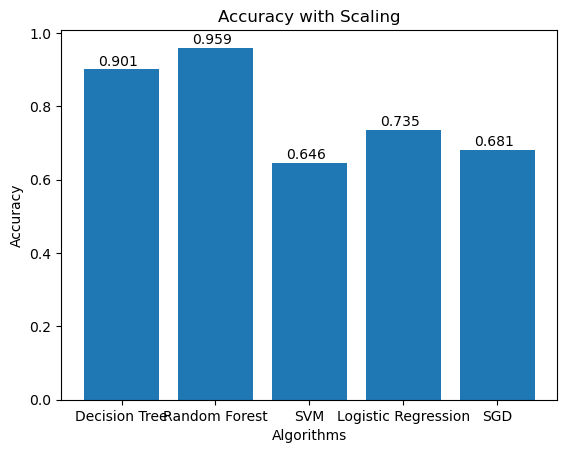

In [16]:
kFoldAverages(5,StandardScaler)

In [18]:
def kFoldBoxAverages(num,scalar):
    SGD_accuracy =[]
    SVM_accuracy =[]
    LG_accuracy =[]
    DT_accuracy =[]
    RF_accuracy = []
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
#         print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        pipe = make_pipeline(scalar(), SGDClassifier())
        pipe.fit(X_train, y_train)
        SGD_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(), SVC(kernel='poly'))
        pipe.fit(X_train, y_train)
        SVM_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),LogisticRegression(C=100, max_iter=1000))
        pipe.fit(X_train, y_train)
        LG_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
        pipe.fit(X_train, y_train)
        DT_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
                   

    
#     print("SGD Test set accuracy", SGD_accuracy) 
#     print("SVM Test set accuracy", SVM_accuracy) 
#     print("LG Test set accuracy", LG_accuracy) 
#     print("DT Test set accuracy", DT_accuracy) 
    plt.title('Accuracy with Scaling')
    plt.xlabel('Algorithms')
    plt.ylabel('Accuracy')
    plt.boxplot([DT_accuracy,RF_accuracy,SVM_accuracy,SGD_accuracy,LG_accuracy],labels= ['Decision Tree','Random Forest', 'SVM', 'Logistic Regression', 'SGD'])
    plt.show()

In [19]:

X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=10)
pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
DT_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy))

Test set accuracy: 0.91


In [20]:
voting_clf = VotingClassifier(
        estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier())],
        voting='hard'
    )

pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
pipe.fit(X_train, y_train)
                   

# Finally, we can evaluate the model's performance on the test set
DT_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy))

Test set accuracy: 0.97


In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=10)

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=5000, bootstrap=True, n_jobs=-1
    )
bag_clf.fit(X_train, y_train)
DT_accuracy = bag_clf.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy))

Test set accuracy: 0.96


In [24]:

X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.1, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(128,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))


Epoch 1/40
169/169 [==============================] - 0s 1ms/step - loss: 0.8394 - accuracy: 0.6157 - val_loss: 0.7298 - val_accuracy: 0.6933
Epoch 2/40
169/169 [==============================] - 0s 711us/step - loss: 0.6419 - accuracy: 0.7313 - val_loss: 0.6395 - val_accuracy: 0.7217
Epoch 3/40
169/169 [==============================] - 0s 709us/step - loss: 0.5775 - accuracy: 0.7531 - val_loss: 0.5930 - val_accuracy: 0.7367
Epoch 4/40
169/169 [==============================] - 0s 707us/step - loss: 0.5410 - accuracy: 0.7696 - val_loss: 0.5897 - val_accuracy: 0.7550
Epoch 5/40
169/169 [==============================] - 0s 709us/step - loss: 0.5191 - accuracy: 0.7831 - val_loss: 0.5564 - val_accuracy: 0.7750
Epoch 6/40
169/169 [==============================] - 0s 738us/step - loss: 0.4991 - accuracy: 0.7957 - val_loss: 0.5268 - val_accuracy: 0.8000
Epoch 7/40
169/169 [==============================] - 0s 947us/step - loss: 0.4785 - accuracy: 0.8013 - val_loss: 0.5208 - val_accuracy: 0